<a href="https://colab.research.google.com/github/kishorekubendiran/predict_aboption_user/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
import scipy.stats
import matplotlib.dates as mdates
import plotly.graph_objects as go
plt.style.use('bmh')

In [8]:
# Checking the encoding of the csv files
with open('/content/takehome_users.csv') as f:
    print(f)
    #for text in f:
        #print(text)
with open('/content/takehome_user_engagement.csv') as f:
    print(f)

<_io.TextIOWrapper name='/content/takehome_users.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/takehome_user_engagement.csv' mode='r' encoding='UTF-8'>


In [9]:
users = pd.read_csv('/content/takehome_users.csv', parse_dates = ['creation_time'], 
                    encoding = "cp1252")
user_eng = pd.read_csv('/content/takehome_user_engagement.csv',  parse_dates = ['time_stamp'], 
                       encoding = "cp1252")

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [11]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


In [12]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187578 entries, 0 to 187577
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  187578 non-null  datetime64[ns]
 1   user_id     187578 non-null  int64         
 2   visited     187578 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.3 MB


In [13]:
user_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,187578.0,5332.23514,3050.536028,1.0,2739.0,5160.0,8048.0,10630.0
visited,187578.0,1.00000,0.000000,1.0,1.0,1.0,1.0,1.0


In [14]:
user_eng.user_id.nunique()

7820

In [15]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [16]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
users['last_session_creation_time'].min(), users['last_session_creation_time'].max()

(1338452406.0, 1402066730.0)

In [18]:
users.last_session_creation_time.dtypes

dtype('float64')

In [19]:
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [20]:
users['last_session_creation_time'].min(), users['last_session_creation_time'].max()

(1338452406.0, 1402066730.0)

In [21]:
users['creation_time'].min(), users['creation_time'].max()

(Timestamp('2012-05-31 00:43:27'), Timestamp('2014-05-30 23:59:19'))

In [22]:
df = user_eng.copy()

In [23]:
df['date'] = pd.to_datetime(df.time_stamp.dt.date)

In [24]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()

In [25]:
df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,187578.0,5332.235140,3050.536028,1.0,2739.0,5160.0,8048.0,10630.0
visited,187578.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
visits_7_days,187578.0,4.416883,2.045489,1.0,3.0,5.0,6.0,7.0


In [27]:
df[df.visits_7_days >= 3.0]

,time_stamp,user_id,visited,date,visits_7_days
9,2014-02-09 03:45:04,2,1,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05,3.0
...,...,...,...,...,...
187570,2013-03-13 10:47:01,10630,1,2013-03-13,3.0
187572,2013-03-19 10:47:01,10630,1,2013-03-19,3.0
187573,2013-03-22 10:47:01,10630,1,2013-03-22,3.0
187576,2013-03-31 10:47:01,10630,1,2013-03-31,3.0


In [28]:
user_adopted = df.groupby('user_id')['visits_7_days'].max().reset_index()

In [29]:
user_adopted['adopted_user'] = user_adopted['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)

In [30]:
user_adopted.head()

,user_id,visits_7_days,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [31]:
user_adopted.adopted_user.value_counts()

0    6400
1    1420
Name: adopted_user, dtype: int64

In [32]:
user_adopted.drop('visits_7_days', axis = 1, inplace = True)
user_adopted.rename(columns={"user_id": "object_id"}, inplace=True)

In [33]:
user_adopted.set_index("object_id", inplace = True)

In [34]:
df_users = users.join(user_adopted, on = 'object_id', how='left')

In [35]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [36]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                7820 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)


In [37]:
df_users['last_session_creation_time'].fillna(0, inplace = True)
df_users['adopted_user'].fillna(0, inplace = True)

In [38]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.0,3000.75,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,12000.0,1.014115e+09,6.087938e+08,0.0,0.00,1.368880e+09,1.393729e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.0,29.00,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.0,3058.00,5.954000e+03,8.817000e+03,1.199900e+04
adopted_user,12000.0,1.183333e-01,3.230159e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00


In [39]:
df_users['email_domain'] = df_users.email.apply(lambda x: x.split('@')[1])

In [40]:
df_users['email_domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: email_domain, Length: 1184, dtype: int64

In [41]:
df_users[~df_users.invited_by_user_id.isnull()].creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

In [42]:
df_users.drop(['object_id', 'name', 'email', 'email_domain'], axis = 1, inplace = True)

In [43]:
df_users.invited_by_user_id.fillna(0, inplace=True)

In [44]:
df_users['days_since_creation'] = (user_eng.time_stamp.max() - df_users.creation_time).dt.days

In [45]:
df_users.drop(['creation_time', 'last_session_creation_time'], axis = 1, inplace = True)

In [46]:
df_users = pd.get_dummies(df_users, columns=['creation_source'])

In [47]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.0,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.0,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.0,108.0,238.25,416.0
invited_by_user_id,12000.0,3188.691333,3869.027693,0.0,0.0,875.0,6317.00,11999.0
adopted_user,12000.0,0.118333,0.323016,0.0,0.0,0.0,0.00,1.0
days_since_creation,12000.0,324.568000,216.646173,6.0,129.0,304.0,506.00,736.0
creation_source_GUEST_INVITE,12000.0,0.180250,0.384412,0.0,0.0,0.0,0.00,1.0
creation_source_ORG_INVITE,12000.0,0.354500,0.478381,0.0,0.0,0.0,1.00,1.0
creation_source_PERSONAL_PROJECTS,12000.0,0.175917,0.380765,0.0,0.0,0.0,0.00,1.0
creation_source_SIGNUP,12000.0,0.173917,0.379054,0.0,0.0,0.0,0.00,1.0


In [48]:
df_users.corr()['adopted_user']

opted_in_to_mailing_list              0.001020
enabled_for_marketing_drip            0.002133
org_id                                0.064690
invited_by_user_id                    0.020564
adopted_user                          1.000000
days_since_creation                   0.085653
creation_source_GUEST_INVITE          0.042985
creation_source_ORG_INVITE           -0.006143
creation_source_PERSONAL_PROJECTS    -0.069658
creation_source_SIGNUP                0.004791
creation_source_SIGNUP_GOOGLE_AUTH    0.034807
Name: adopted_user, dtype: float64

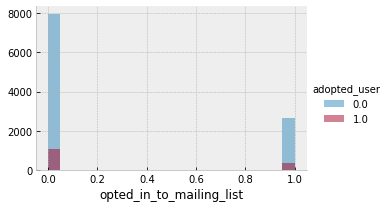

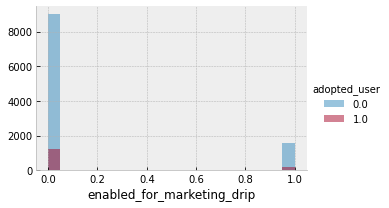

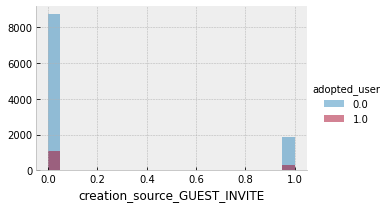

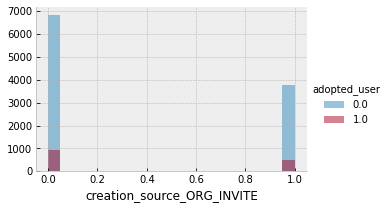

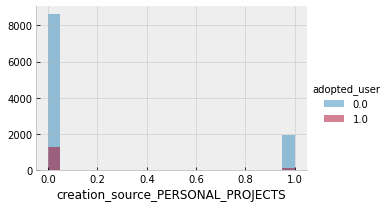

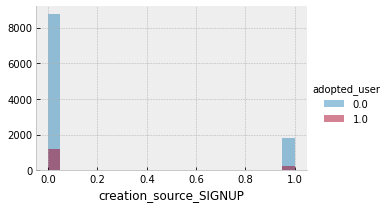

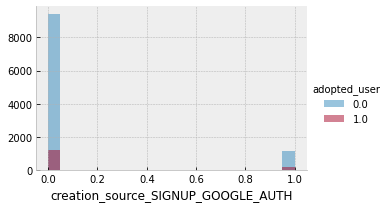

In [49]:
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
    g = sns.FacetGrid(df_users, hue = "adopted_user", height=3, aspect=1.5,)
    g.map(plt.hist, col, alpha=.5, bins = 20)
    g.add_legend() 

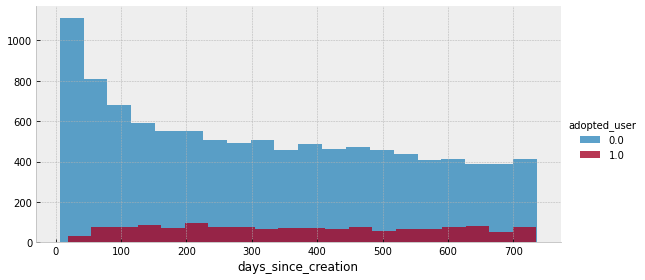

In [50]:
g = sns.FacetGrid(df_users, hue = "adopted_user", height=4, aspect=2,)
_ = g.map(plt.hist, 'days_since_creation', alpha=0.8, bins = 20)
_ = g.add_legend() 

In [51]:
# Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,\
precision_score, recall_score, f1_score

In [52]:
def cv_optimize(model, parameters, Xtrain, ytrain, n_folds = 5):
    """
    Cross validation. Function to hypertune the model "model" with the input paramete distribution using
    "parameters" on the training data.
    The output will be the best estimator whose average score on all folds will be best. 
    """
    clf = GridSearchCV(model, param_grid = parameters, cv = n_folds, scoring = 'accuracy')
    t0 = time.time()
    clf.fit(Xtrain, ytrain)
    time_fit = time.time() - t0 
    print('\n\n\n=============================',type(model).__name__,'=================================\n')
    print("It takes %.3f seconds for tuning " % (time_fit))
    print("BEST PARAMS", clf.best_params_)
    best = clf.best_estimator_
    return best
    
def do_classify(model, parameters, df, targetname, scale = True, cols_to_transform = 'numeric', 
                featurenames = 'all', train_size = 0.8):
      
    # Creating the X and y variables for our model
    if featurenames == 'all':
        X = df.drop([targetname], axis = 1)
    else:
        X = df[featurenames]
        
    y = df[targetname]
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = train_size)

    model = cv_optimize(model, parameters, Xtrain, ytrain)
    t0 = time.time()
    model = model.fit(Xtrain, ytrain)
    time_fit = time.time() - t0 
    print("It takes %.3f seconds for fitting" % (time_fit))
    training_accuracy = model.score(Xtrain, ytrain)
    test_accuracy = model.score(Xtest, ytest)
    precision = precision_score(ytest, model.predict(Xtest))
    recall = recall_score(ytest, model.predict(Xtest))
    AUC = roc_auc_score(ytest, model.predict_proba(Xtest)[:,1])
            
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    print("Precision on test data:    {:0.2f}".format(precision))
    print("Recall on test data:       {:0.2f}".format(recall))
    print("AUC on test data:          {:0.2f}".format(AUC))
    print("=======Confusion Matrix=========")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("=======Classification report=======")
    print(classification_report(ytest, model.predict(Xtest)))
    print("="*100)
    print("="*100)
    print("="*100)
    return model, Xtrain, ytrain, Xtest, ytest

In [53]:
# Random Forest model
model_rf = RandomForestClassifier(class_weight='balanced') # adding balanced to handle the unbalanced data
parameters_rf = {
                 'n_estimators': [10, 25, 50, 75, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 6, 10, 12],
                 'max_features': ['auto', 'sqrt']
                }

In [54]:
model_rf, Xtrain, ytrain, Xtest, ytest = do_classify(model_rf, parameters_rf, 
                                                                  df_users, targetname = 'adopted_user')




============================= RandomForestClassifier =================================

It takes 139.597 seconds for tuning 
BEST PARAMS {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 50}
It takes 0.457 seconds for fitting
Accuracy on training data: 0.84
Accuracy on test data:     0.74
Precision on test data:    0.18
Recall on test data:       0.32
AUC on test data:          0.63
=======Confusion Matrix=========
[[1681  424]
 [ 201   94]]
=======Classification report=======
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      2105
         1.0       0.18      0.32      0.23       295

    accuracy                           0.74      2400
   macro avg       0.54      0.56      0.54      2400
weighted avg       0.81      0.74      0.77      2400



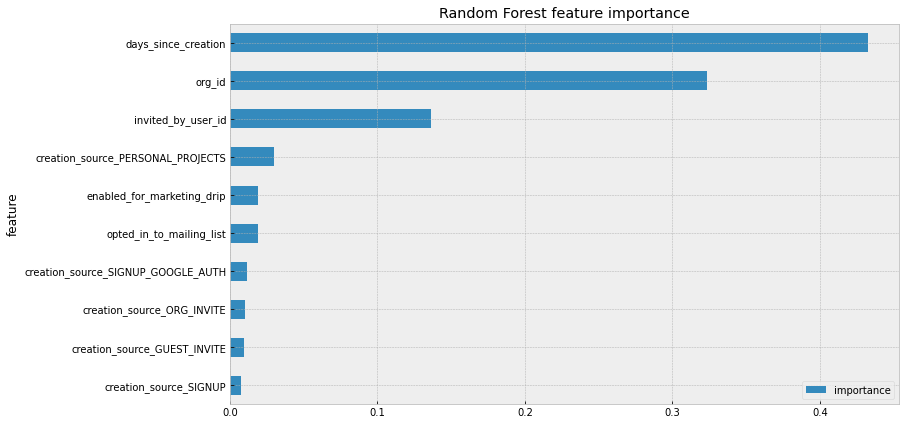

In [55]:
feat_imp = pd.DataFrame({'importance':model_rf.feature_importances_})    
feat_imp['feature'] = Xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
_ = feat_imp.plot.barh(title = 'Random Forest feature importance', figsize = (12,7))